# What makes people happy? Can you find Dystopia?

   The `World Happiness Report` is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. Over the last year’s, `World Happiness Report` focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

![](https://www.comunicaffe.com/wp-content/uploads/2021/03/WHR-2021_press.jpg)


**Dataset information**


   The underlying source of the happiness scores in the World Happiness Report is the **Gallup World Poll** —a set of nationally representative surveys undertaken in more than 160 countries in over 140 languages.


    
   The rankings are based on answers to the main life evaluation question asked in the poll (Also known as "Cantril ladder"):
         **“Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?”.**  
   
   The rankings are from nationally representative samples, using the average for surveys conducted in the three years 2015-2017 (For year 2018). They are based entirely on the survey scores, using the Gallup weights to make the estimates representative. 




The Happiness Score is explained by the following factors:

- `Overall rank`: happiness rank of the different countries
- `Country o region`
- `Score`:  is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder. Ranges from [0-10]
- `GDP per capita`: in terms of Purchasing Power Parity (PPP) adjusted to constant 2011 international dollars, taken from taken from the World Development Indicators (WDI) released by the World Bank in September 2017.

- `Healthy Life Expectancy`: score that goes from [0-1], being 1 the ones that have more confidence in terms of healthy life. Constructed based on data from the World Health Organization (WHO) and WDI.

- `Social support`: it indicates how people are appreciating the social support by governments, and it that ranges from [0-1]??
    Caluclated with the national average of the binary responses (either 0 or 1) to the Gallup World Poll (GWP) question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

- `Freedom to make life choices` score that ranges from 0 to 1, being 1 the ones that feel more free.
   National average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”.
   
- `Generosity`:score that ranges from 0 to 1.
     This score is the residual of regressing the national average of GWP responses to the question “Have you donated money to a charity in the past month?” on GDP per capita. 

- `Perceptions of corruption`: perception of corruption on the country that it goes from  0 to 1. The higher this value is the lower perception of corruption.
    Perceptions of corruption are the average of binary answers to two GWP questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” Where data for government corruption are missing, the perception of business corruption is used as the overall corruption-perception measure.
- `Year`  


>dataset: `Ex2.2._Happiness-Score.csv`

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
import scipy.stats as sp # for calculating standard error
#import pycountry_convert as pc
import plotly.express as px
from scipy import stats


import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0, '/Users/hayre/Desktop/Ana Data Science/_functions_')

from Functions_EDA import *

## Datasets

In [4]:
df= pd.read_csv('../../datasets/Students_turn/Ex2.2._Happiness-Score.csv', skipinitialspace = True)
df_raw = df.copy()

health = pd.read_csv('../../datasets/Students_turn/happy2018.csv', skipinitialspace = True)
health_raw = health.copy()


# Preparation dataset


In [5]:
df

,Unnamed: 0.1,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,0,0,1,Finland,7.632,1.305,1.592,NaN,0.681,0.202,0.393,2018
1,1,1,2,Norway,7.594,1.456,1.582,NaN,0.686,0.286,0.340,2018
2,2,2,3,Denmark,7.555,1.351,1.590,NaN,0.683,0.284,0.408,2018
3,3,3,4,Iceland,7.495,1.343,1.644,NaN,0.677,0.353,0.138,2018
4,4,4,5,Switzerland,7.487,1.420,1.549,NaN,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
307,307,151,152,Rwanda,3.334,0.359,0.711,NaN,0.555,0.217,0.411,2019
308,308,152,153,Tanzania,3.231,0.476,0.885,NaN,0.417,0.276,0.147,2019
309,309,153,154,Afghanistan,3.203,0.350,0.517,NaN,0.000,0.158,0.025,2019
310,310,154,155,Central African Republic,3.083,0.026,0.000,NaN,0.225,0.235,0.035,2019


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  312 non-null    int64  
 1   Unnamed: 0                    312 non-null    int64  
 2   Overall rank                  312 non-null    int64  
 3   Country or region             312 non-null    object 
 4   Score                         312 non-null    float64
 5   GDP per capita                312 non-null    float64
 6   Social support                312 non-null    float64
 7   Healthy life expectancy       7 non-null      float64
 8   Freedom to make life choices  312 non-null    float64
 9   Generosity                    312 non-null    float64
 10  Perceptions of corruption     311 non-null    float64
 11  year                          312 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 29.4+ KB


In [7]:
df.round(2)
df.isnull().sum() #drop Healthy life expectancy and get it from external dataset kaggle for 2018

Unnamed: 0.1                      0
Unnamed: 0                        0
Overall rank                      0
Country or region                 0
Score                             0
GDP per capita                    0
Social support                    0
Healthy life expectancy         305
Freedom to make life choices      0
Generosity                        0
Perceptions of corruption         1
year                              0
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Overall rank', 'Country or region',
       'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')

In [9]:
data =df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Healthy life expectancy'])


In [10]:
data.rename(columns = {'Overall rank': 'Rank','Country or region':'Country',
                     'GDP per capita':'GDP', 'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Corruption'},inplace=True)

In [11]:
data.loc[data.isnull().any(axis=1)]

,Rank,Country,Score,GDP,Social support,Freedom,Generosity,Corruption,year
19,20,United Arab Emirates,6.774,2.096,0.776,0.284,0.186,NaN,2018


In [12]:
data.loc[data["Country"]== "United Arab Emirates"] #fill regardless...

,Rank,Country,Score,GDP,Social support,Freedom,Generosity,Corruption,year
19,20,United Arab Emirates,6.774,2.096,0.776,0.284,0.186,NaN,2018
176,21,United Arab Emirates,6.825,1.503,1.310,0.598,0.262,0.182,2019


In [13]:
data = fill_na(data)

Number of missing values on your dataset are

Rank              0
Country           0
Score             0
GDP               0
Social support    0
Freedom           0
Generosity        0
Corruption        0
year              0
dtype: int64


In [14]:
data.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
Rank,312.0,78.5,45.1,1.0,39.8,78.5,117.2,156.0
Score,312.0,5.4,1.1,2.9,4.5,5.4,6.2,7.8
GDP,312.0,0.9,0.4,0.0,0.6,1.0,1.2,2.1
Social support,312.0,1.2,0.3,0.0,1.1,1.3,1.5,1.6
Freedom,312.0,0.4,0.2,0.0,0.3,0.4,0.5,0.7
Generosity,312.0,0.2,0.1,0.0,0.1,0.2,0.2,0.6
Corruption,312.0,0.1,0.1,0.0,0.0,0.1,0.1,0.5
year,312.0,2018.5,0.5,2018.0,2018.0,2018.5,2019.0,2019.0


In [15]:
data["Country"].value_counts().nsmallest(10)

North Macedonia    1
Gambia             1
Swaziland          1
Sudan              1
Belize             1
Macedonia          1
Angola             1
Comoros            1
Finland            2
Ivory Coast        2
Name: Country, dtype: int64

In [16]:
data.groupby('Country').filter(lambda x: len(x)== 1)



,Rank,Country,Score,GDP,Social support,Freedom,Generosity,Corruption,year
48,49,Belize,5.956,0.807,1.101,0.593,0.183,0.089,2018
88,89,Macedonia,5.185,0.959,1.239,0.394,0.173,0.052,2018
136,137,Sudan,4.139,0.605,1.240,0.016,0.134,0.082,2018
141,142,Angola,3.795,0.730,1.125,0.000,0.079,0.061,2018
239,84,North Macedonia,5.274,0.983,1.294,0.345,0.185,0.034,2019
275,120,Gambia,4.516,0.308,0.939,0.382,0.269,0.167,2019
290,135,Swaziland,4.212,0.811,1.149,0.313,0.074,0.135,2019
297,142,Comoros,3.973,0.274,0.757,0.142,0.275,0.078,2019


In [17]:
data[data['Country'].str.contains(pat = 'Macedonia')]

,Rank,Country,Score,GDP,Social support,Freedom,Generosity,Corruption,year
88,89,Macedonia,5.185,0.959,1.239,0.394,0.173,0.052,2018
239,84,North Macedonia,5.274,0.983,1.294,0.345,0.185,0.034,2019


## Data by year

In [18]:
data18 = data[(data.year == 2018)]
data19 = data[(data.year == 2019)]


## Adding health expectancy to 2018

In [19]:
health

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [20]:
health =health.drop(columns=['Score','Overall rank', 'GDP per capita', 'Social support', 'Freedom to make life choices','Generosity', 'Perceptions of corruption'])


In [21]:
health.rename(columns = {"Country or region" : "Country"},inplace=True)


In [22]:
health

,Country,Healthy life expectancy
0,Finland,0.874
1,Norway,0.861
2,Denmark,0.868
3,Iceland,0.914
4,Switzerland,0.927
...,...,...
151,Yemen,0.343
152,Tanzania,0.381
153,South Sudan,0.177
154,Central African Republic,0.010


In [23]:
data18 = pd.merge(data18, health, how="left", on=['Country'])




In [24]:
data18

,Rank,Country,Score,GDP,Social support,Freedom,Generosity,Corruption,year,Healthy life expectancy
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018,0.874
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018,0.861
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018,0.868
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018,0.914
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018,0.927
...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.244,0.083,0.064,2018,0.343
152,153,Tanzania,3.303,0.455,0.991,0.481,0.270,0.097,2018,0.381
153,154,South Sudan,3.254,0.337,0.608,0.112,0.224,0.106,2018,0.177
154,155,Central African Republic,3.083,0.024,0.000,0.305,0.218,0.038,2018,0.010


In [25]:
data18 = data18.drop(columns=['year'])

# Descriptive statistics

In [26]:
data.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Rank,312.0,78.5,45.1,1.0,39.8,78.5,117.2,156.0
Score,312.0,5.4,1.1,2.9,4.5,5.4,6.2,7.8
GDP,312.0,0.9,0.4,0.0,0.6,1.0,1.2,2.1
Social support,312.0,1.2,0.3,0.0,1.1,1.3,1.5,1.6
Freedom,312.0,0.4,0.2,0.0,0.3,0.4,0.5,0.7
Generosity,312.0,0.2,0.1,0.0,0.1,0.2,0.2,0.6
Corruption,312.0,0.1,0.1,0.0,0.0,0.1,0.1,0.5
year,312.0,2018.5,0.5,2018.0,2018.0,2018.5,2019.0,2019.0


In [27]:
data18.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
Rank,156.0,78.5,45.2,1.0,39.8,78.5,117.2,156.0
Score,156.0,5.4,1.1,2.9,4.5,5.4,6.2,7.6
GDP,156.0,0.9,0.4,0.0,0.6,0.9,1.2,2.1
Social support,156.0,1.2,0.3,0.0,1.1,1.3,1.5,1.6
Freedom,156.0,0.5,0.2,0.0,0.4,0.5,0.6,0.7
Generosity,156.0,0.2,0.1,0.0,0.1,0.2,0.2,0.6
Corruption,156.0,0.1,0.1,0.0,0.1,0.1,0.1,0.5
Healthy life expectancy,156.0,0.6,0.2,0.0,0.4,0.6,0.8,1.0


In [28]:
data19.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
Rank,156.0,78.5,45.2,1.0,39.8,78.5,117.2,156.0
Score,156.0,5.4,1.1,2.9,4.5,5.4,6.2,7.8
GDP,156.0,0.9,0.4,0.0,0.6,1.0,1.2,1.7
Social support,156.0,1.2,0.3,0.0,1.1,1.3,1.5,1.6
Freedom,156.0,0.4,0.1,0.0,0.3,0.4,0.5,0.6
Generosity,156.0,0.2,0.1,0.0,0.1,0.2,0.2,0.6
Corruption,156.0,0.1,0.1,0.0,0.0,0.1,0.1,0.5
year,156.0,2019.0,0.0,2019.0,2019.0,2019.0,2019.0,2019.0


In [29]:
data18.Score.mode()[0]

5.358

In [30]:
data18.GDP.mode()[0]

0.332

In [31]:
data18['Social support'].mode() [0]

0.8959999999999999

In [32]:
data18['Corruption'].mode() [0]

0.0819999999999999

In [33]:
data18['Generosity'].mode() [0]

0.092

In [34]:
data18.Freedom.mode() [0]

0.312

In [35]:
data18['Healthy life expectancy'].mode() [0]

0.343

## Correlation heatmaps 

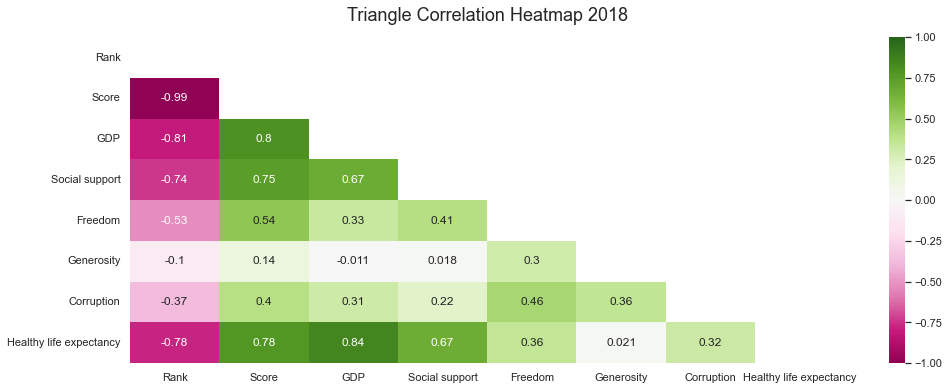

In [36]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data18.corr(), dtype=np.bool))
heatmap = sns.heatmap(data18.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('Triangle Correlation Heatmap 2018', fontdict={'fontsize':18}, pad=16); ##How all 0.8 same color??)

Text(0.5, 1.0, 'Triangle Correlation Heatmap 2019')

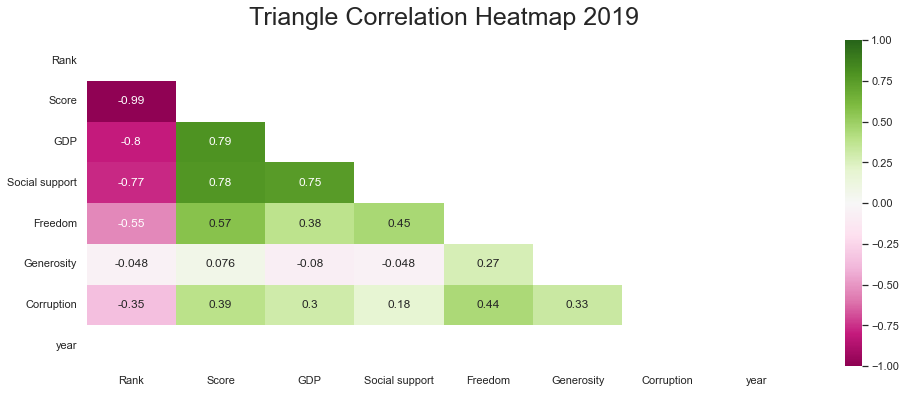

In [37]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data19.corr(), dtype=np.bool))
heatmap = sns.heatmap(data19.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('Triangle Correlation Heatmap 2019', fontdict={'fontsize':25}, pad=15)

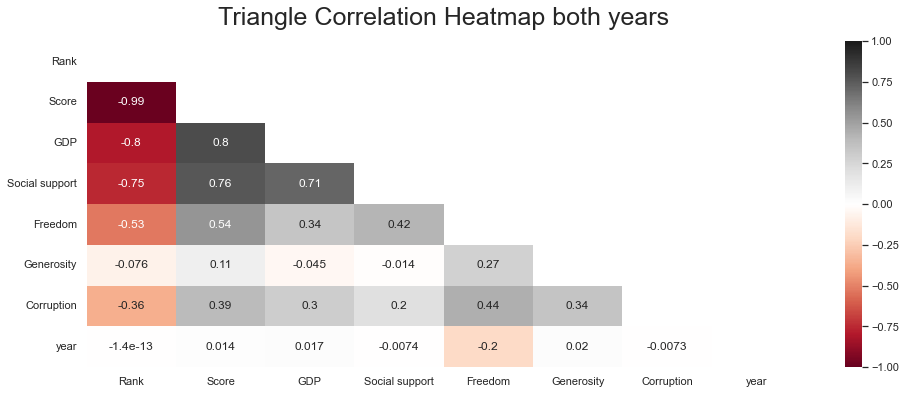

In [38]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdGy')
heatmap.set_title('Triangle Correlation Heatmap both years', fontdict={'fontsize':25}, pad=16); ##How all 0.8 same color??)

# Violinplots and Pairplots for 2018

In [39]:
pairplot1 = data18.filter(['Social support','Freedom', 'Generosity', 'Corruption', 'Healthy life expectancy'], axis=1) #same index
pairplot2 = data18.filter(['GDP', 'Score', 'Social support'], axis=1) #highest correlation

In [ ]:


scale2 = data18.filter(['Freedom', 'Generosity', 'Corruption', 'Healthy life expectancy'], axis=1)
scale3 = data18.filter(['Social support', "GDP"], axis=1)

fig, axes = plt.subplots(ncols=2, figsize=(14,7))


sns.violinplot(x="variable", y="value", ax=axes[0],inner="quartile",data=pd.melt(scale2)).set(title='2018- Variables scale 0-1')
sns.violinplot(x="variable", y="value", ax=axes[1],inner="quartile",data=pd.melt(scale3)).set(title='2018- Variables scale bigger than 0-1')

plt.show()

In [ ]:
g=sns.pairplot(
    pairplot1,
  
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
corner=True)

g.map_lower(sns.scatterplot, color='LightCoral')




In [ ]:
g =sns.pairplot(
    pairplot2,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),corner=True
)


g.map_lower(sns.scatterplot, color='Purple')


# TOP- LOWEST-MiDDLE COUNTRIES by Score


In [ ]:
a= data18.groupby('Country').filter(lambda x: x['Score'] < 3.590)
c= data18.groupby('Country').filter(lambda x: x['Score'] > 7.2)
b = data18[data18['Score'].between(5.30, 5.48)]
frames = [a,b,c]

results = pd.concat(frames)

A= data18.groupby('Country').filter(lambda x: x['Score'] < 3.590)

B = data18.groupby('Country').filter(lambda x: x['Score'] > 7.2)
frame = [A,B]

result = pd.concat(frame)
result


In [ ]:
px.choropleth(data,
              locations='Country',
              locationmode='country names',
              color='Score',
              projection='kavrayskiy7',
              color_continuous_scale=px.colors.sequential.RdBu,
              scope='world',
              title='Cantril score worldwide')

In [ ]:
#A very depressing view of perception of corruption 
px.choropleth(data,
              locations='Country',
              locationmode='country names',
              color='Corruption',
              projection='kavrayskiy7',
              color_continuous_scale=px.colors.sequential.RdBu,
              scope='world',
              title='"Corruption perception worldwide" -The higher the score, lower the perception')

In [ ]:
px.choropleth(data,
              locations='Country',
              locationmode='country names',
              color='Social support',
              projection='kavrayskiy7',
              color_continuous_scale=px.colors.sequential.RdBu,
              scope='world',
              title='Social support worldwide')

In [ ]:
px.choropleth(data,
              locations='Country',
              locationmode='country names',
              color='Social support',
              projection='kavrayskiy7',
              color_continuous_scale=px.colors.sequential.RdBu,
              scope='south america',
              title='Social support South America')

In [ ]:
px.choropleth(data,
              locations='Country',
              locationmode='country names',
              color='Social support',
              projection='kavrayskiy7',
              color_continuous_scale=px.colors.sequential.RdBu,
              scope='africa',
              title='Social support Africa')

In [ ]:
fig = px.scatter(results, x="Country", y="Score", color="Score", 
           template="plotly_white", title="Cantril Score by Country-2018", )
#fig.update_layout(title_text='Score by Country 2018', title_x=0.9)
fig.update_xaxes(tickangle=35)
fig.show()

In [ ]:
fig = px.scatter(result, y="Social support", x="Corruption",
                 color='Country',
                 size='GDP',size_max=30)

# Step 2: Update the layout of the plot

fig.update_layout(title_text='[2018] Bubble chart Corruption with Social support')

# axes styling
fig.update_yaxes(title= 'Social support',ticklen= 5,zeroline= False)
fig.update_xaxes(title= 'Corruption',ticklen= 5,zeroline= False)   
    
fig.update_layout(coloraxis_showscale=False)
fig.show()
fig.write_html("file.svg")

In [ ]:
fig = px.scatter(results, y="GDP", x="Corruption",
                 color='Country',
                 size='GDP',size_max=30)

# Step 2: Update the layout of the plot

fig.update_layout(title_text='[2018] Bubble chart GDP with Corruption sub20')

# axes styling
fig.update_yaxes(title= 'GDP per capita',ticklen= 5,zeroline= False)
fig.update_xaxes(title= 'Perception of Corruption',ticklen= 5,zeroline= False)   
    
fig.update_layout(coloraxis_showscale=False)
fig.show()
fig.write_html("file.svg")

In [ ]:
fig = px.scatter(result, x="Freedom", y="Social support", color="Country", 
           template="plotly_white")

fig.show()

In [ ]:
fig = px.scatter(results, x="Freedom", y="Social support", color="Score", 
           template="plotly_white")

fig.show()

In [ ]:
fig = px.scatter(results, x="GDP", y="Healthy life expectancy", color="Score", 
           template="plotly_white")

fig.show()

In [ ]:
fig = px.scatter(results, y="Social support", x="Healthy life expectancy",
                 color='Country',
                 size='GDP',size_max=30)

# Step 2: Update the layout of the plot

fig.update_layout(title_text='[2018] Bubble chart GDP with Corruption sub20')

# axes styling
fig.update_yaxes(title= 'Social support',ticklen= 5,zeroline= False)
fig.update_xaxes(title= 'Life expectancy',ticklen= 5,zeroline= False)   
    
fig.update_layout(coloraxis_showscale=False)
fig.show()
fig.write_html("file.svg")

# Cantril scale: What does it mean?? Creation new column

![](https://pbs.twimg.com/media/En8ayU_XMAEs4CD.jpg)




**Thriving**  wellbeing that is strong, consistent, and progressing. 
              These respondents have positive views of their present life situation. They report significantly fewer health problems, fewer sick days, less worry, stress, sadness, anger, and more happiness, enjoyment, interest, and respect.
              
             *10= prospering / 9=thriving / 8= blooming / 7= doing well*
              
**Strugling** wellbeing that is moderate or inconsistent.struggling in the present, or expect to struggle in the future. They report more daily stress and worry about money than the “thriving” respondents, and more than double the amount of sick days. They are more likely to smoke, and are less likely to eat healthy.

             *6= just ok / 5= coping / 4= struggling*

**Suffering** Wellbeing that is at high risk. They are more likely to report lacking the basics of food and shelter, more likely to have physical pain, a lot of stress, worry, sadness, and anger. They have less access to health insurance and care, and more than double the disease burden, in comparison to “thriving” respondents.

            *3= suffering/ 2= depressed / 1= hopeless*

## Adding column CONTINENT

In [ ]:
def country_to_continent(Country):
    country_alpha2 = pc.country_name_to_country_alpha2(Country)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

def get_continent(item):
   
    try:
        iso2_code =  pc.country_name_to_country_alpha2(item,cn_name_format="default")
        continent = pc.country_alpha2_to_continent_code(iso2_code)
    except:
        iso2_code = 'Not known'
        continent = 'Not known'
    return continent
data['Continent'] = data.Country.apply(lambda x: get_continent(x))




In [ ]:
def country_to_continent(Country):
    country_alpha2 = pc.country_name_to_country_alpha2(Country)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

def get_continent(item):
   
    try:
        iso2_code =  pc.country_name_to_country_alpha2(item,cn_name_format="default")
        continent = pc.country_alpha2_to_continent_code(iso2_code)
    except:
        iso2_code = 'Not known'
        continent = 'Not known'
    return continent
data18['Continent'] = data18.Country.apply(lambda x: get_continent(x))



## Adding Cantril column

In [ ]:
# create a list of our conditions
conditions = [
    (data['Score'] >=7 ),
    (data['Score'] >=4 ) & (data['Score'] <7),
    (data['Score']<4)]

# create a list of the values we want to assign for each condition
values = ['Thriving', 'Struggling', 'Suffering']

# create a new column and use np.select to assign values to it using our lists as arguments
data['Cantril'] = np.select(conditions, values)

# display example
data.loc[data["Country"]== "France"]

In [ ]:
#data.loc[data["Continent"]== "Not known"] #We aware we ave this situation but we will not  be adressed

In [ ]:
#data.loc[data["Continent"]== "NA"]

In [ ]:
sns.catplot(x="Cantril", kind="count", palette="Set2", data=data)

In [ ]:
data.groupby('Cantril')['Continent'].count()

In [ ]:
pd.crosstab(index =data['Continent'], columns=data['Cantril'], margins=True,margins_name="Total", normalize='index').T\
    .round(4)*100

#### Following our analysis, only 10% of countries in the world are "striving", following the Cantril scale. However, no country has a score higher of 7, which translates in "doing well" (lowest score in the  **Thriving category**). This countries are mostly europeans, New Zealand and Australia.

#### We need to be cautious, however, interpreting the percentages of "North America", as countries of Central America are also included and, in our analysis, don't have an own category.

#### 80% of countries are "just ok"(6), "coping"(5) or "struggling", which are encompassed in the **Struggling category**.



## What is the real difference between 6.888 and 7? What happens if we reconsider our numbers:

In [ ]:
data['Score_rounded'] = data['Score'].apply(np.round)
data

In [ ]:
# create a list of our conditions
conditions = [
    (data['Score'] >=7 ),
    (data['Score'] >=4 ) & (data['Score'] <7),
    (data['Score']<4)]

# create a list of the values we want to assign for each condition
values = ['Thriving', 'Struggling', 'Suffering']

# create a new column and use np.select to assign values to it using our lists as arguments
data['Cantril rounded'] = np.select(conditions, values)



In [ ]:
sns.catplot(x="Score_rounded", kind="count", palette="Set2", data=data) #most people are just ok

## Thoughts on: Why can't find a cohesive pattern?
#### Well each subset of countries have a particular socioeconomic setting, as well as cultural values, that explain the differences (i.e South America ranks higher than expected in most of the research about life satisfaction). Also there are some concominants variables at play from which we have no idea without further research.

# To end on a happy note : World Value survey: another source on cross-country data on self-reported well being.

The World Value Survey collects data from a series of representative national surveys covering almost 100 countries, with the earliest estimates dating back to 1981. 
Respondents are asked: 

   **“Taking all things together, would you say you are (i) Very happy, (ii) Rather happy, (iii) Not very happy or (iv) Not at all happy”.** 

This visualization plots the share of people answering they are Very happy or Rather happy.


In [ ]:
 %%html
<iframe src="https://ourworldindata.org/grapher/share-of-people-who-say-they-are-happy" loading="lazy" style="width: 80%; height: 500px; border: 0px none;"></iframe>



In [ ]:
%%html
<iframe src="https://ourworldindata.org/grapher/Happiness-WVS-vs-Gallup" loading="lazy" style="width: 100%; height: 600px; border: 0px none;"></iframe>


## Before finishing... what were we really looking at?


The overall length of each country bar represents the average ladder score, which is also shown in numerals. The rankings in Figure 2.2 depend only on the average Cantril ladder scores reported by the respondents.
Each of these bars is divided into seven segments, showing the research efforts to find possible sources for the ladder levels. The first six sub-bars show how much each of the six
key variables is calculated to contribute to that country’s ladder score, relative to that in a hypothetical country called Dystopia.

The width of these different sub-bars then shows, country-by-country, how much each of the six variables is calculated to contribute to that country’s ladder score, relative to that in a hypothetical country called Dystopia, so named because it has values equal to the world’s lowest national averages for 2015-2017 for each of the six key variables used in Table 2.1. These calculations are illustrative rather than conclusive, for several reasons. First, the selection of candidate variables is restricted by what is available for all these countries.

Why does this information matter?. Because our data set is the numbers from this analysis, the numbers used to create the figure 2.2, and not the data from the survey results as be first understood.

![](https://pbs.twimg.com/media/Ew3jx3xUcAEBHY0.jpg)



In [ ]:
data2018 = data18.copy()

In [ ]:
data2018["Sum"]= (data2018["GDP"]+data2018['Social support']+data2018['Freedom']+data2018['Generosity']+data2018['Corruption']+data2018['Healthy life expectancy'])

In [ ]:
data2018["GDP_%"]= (data2018["GDP"]* 100)/ data2018["Sum"]
data2018["Support_%"]= (data2018["Social support"]* 100)/ data2018["Sum"]
data2018["Freedom_%"]= (data2018["Freedom"]* 100)/ data2018["Sum"]
data2018["Generosity_%"]= (data2018["Generosity"]* 100)/ data2018["Sum"]
data2018["Corruption_%"]= (data2018["Corruption"]* 100)/ data2018["Sum"]
data2018["Life expectancy_%"] = (data2018["Healthy life expectancy"]* 100)/ data2018["Sum"]

In [ ]:
data2018.describe().T.round()

Taking in consideration the average of all the country percentages, 67% of the Cantril score is explained by Social support, Freedom to make life choices and Healthy life expectancy.

But, let's not forget *our analysis is not exactly as the study, and we do not have the residual column*. We just tried to understand the original report explanation.